<font size=6  color=#003366> <b>[LEPL1109] - STATISTICS AND DATA SCIENCES</b> <br><br> 
<b>Hackathon 03 - Clustering: What is it all about?</b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Anne-Sophie Collin   (anne-sophie.collin@uclouvain.be)<br>
Guillaume Van Dessel (guillaume.vandessel@uclouvain.be)<br>
Antoine Legat (antoine.legat@uclouvain.be)<br>
Jérome Eertmans (jerome.eertmans@uclouvain.be)<br>
<div style="text-align: right"> Version 2023</div>

<br><br>
</font>

<div class="alert alert-danger">
    This notebook is meant to be <b>displayed on a web browser</b>. If you are using Visual Studio, or anything else, things might not be displayed as expected. 
</div>

<font size=5 color=#009999> <b>GUIDELINES & DELIVERABLES</b> </font> <br>
-  Copying code or answers from other groups (or from the internet) is strictly forbidden. <b>Each source of inspiration (stack overflow, git, other groups, ...) must be clearly indicated!</b> (We can detect plagiarism)
-  This <b>notebook</b> (".ipynb" file) and the <b>report</b> (".pdf" file) must be delivered on <b>Gradescope</b> before **Friday, the 22nd of December 20h00**.
- We provide a <b>LaTeX template of the report</b> which can be found on Moodle. It is <b>mandatory to answer the questions in the spaces provided</b>. Gradescope will not work if answers are outside the boxes.
- The <b>grading</b> will be determined based on the <b>quality</b> of your <b>results</b> and your <b>report</b>. <b>Not</b> on the quality of your <b>code</b>. This <b>notebook</b> serves as a basis for the deliverables but it will <b>not</b> be <b>evaluated</b>.<br><br>

<img src="Imgs/inaturalist.png" width = "600">

<div class="alert alert-danger">
<b>[DELIVERABLE] Summary</b>  <br>
After the reading of this document (and playing with the code!), we expect you to provide us with:
<ol>
   <li> a PDF report written with the LaTeX template available on Moodle. It is <b>mandatory to keep the template as provided</b>;
   <li> and this Jupyter Notebook (it will not be read, just checked for plagiarism);
</ol>

before <b>Friday, Friday the 22nd of December 22h00</b> on Gradescope.

<b>Please</b>, export your image in <b>PDF</b> format, not JPEG or PNG, beforing including them in your report.<br> Exporting images in PDF is as simple as using the appropriate filename extension (see example below)!
</div>

```python
# with matplotlib
plt.savefig("my_image.pdf")

# with plotly
fig.write_image("my_image.pdf")
```


<font size=5 color=#009999> <b>CONTEXT & NOTEBOOK STRUCTURE</b> </font> <br>
    
The objective of this hackathon is threefold:
1. extract meaningful information from a dataset;
2. observe relationship(s) (if any) between features and eventual underlying groups (clusters);
3. and develop an unsupervised clustering tool and exploit the associated data.

To this end, you will use a dataset (available on Moodle) inspired from the iNaturalist dataset that can be found on [GBIF](https://www.gbif.org/dataset/50c9509d-22c7-4a22-a47d-8c48425ef4a7). The provided version of the dataset only contains observations performed in Belgium and a reduced number of features, to avoid too large files.

<font size=4 color=#AAAAAA> <b>HOW OBSERVATIONS ARE CLASSIFIED</b> </font> <br>

iNaturalist is a platform that helps users identify the plants and animals around, while generating data for science and conservation, mostly thanks to their smartphone application. As a result, the iNaturalist dataset contains a large amount of observations (~73 000 000 as of 2023).

In biology, individuals are classified using taxons. Taxons are organized in levels, from the **least** specific (*Life*) to the **most** (*Species*). The highest level is *Life*, as it contains the most individuals. In opposition, the lowest level is *Species*.

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a5/Biological_classification_L_Pengo_vflip.svg" width = "200">

The iNaturalist contains, for every observation, taxonomy levels from *Kingdom* to *Species*. It is important to understand that those levels create a hierarchy. Thus, knowing the *Class* of an individual fully determines all levels above: *Phylum*, *Kingdom*, etc.

An example of taxonomy classification of three well known species is shown in the image below.

<img src="https://dr282zn36sxxg.cloudfront.net/datastreams/f-d%3A816756bf99d9575eedaf35a4307be942a03a3bbf2b774ac7090999cc%2BIMAGE_TINY%2BIMAGE_TINY.1" width = "500">

<font size=4 color=#AAAAAA> <b>YOUR GOALS</b> </font> <br>

Given a couple features and a given taxon level, `n`, you should be able to **create taxon-level clusters based on spatial-temporal coordinates and other provided features. Then, you must exploit the content of these different clusters to determine the likeliness of observating a given taxon level for some provided input requests, such as time, position, and the taxon levels above.**

> **Example**. Imagine you are wandering near the Bois des Rêves at midnight, and you want to know the most likely animal *Order* your could observe among animals whose *Class* is *Mammalia*.


<div class="alert alert-danger">
    Due to the hierarchical orgnization of taxons, it is important to understand that predicting a level <code>n</code> only makes sense if you do not have information about level <code>n-1</code> and lower.
    Trying to predict low taxonomy levels may be a difficult task for reasons you should determine yourselves. On the other side, predicting a very high level of taxonomy may not be interesting either. Choosing the right taxonomy level to predict is a challenging question that will highly impact your results! We will thus propose a <i>default</i> taxon level for the sake of simplicity.

    default taxon-level: ORDER
</div>

To synthesize, there are three main milestones: 

* **unsupervised clustering** of elements from the learning dataset based on some selected features;
* **supervised label assignment** of each formed cluster; e.g., name each cluster after the most appearing taxon within elements present in the cluster, taken at the <i>default</i> taxon level;
* and **supervised benchmarking** of the quality of this "*clustering + assignment*" procedure by trying to predict the taxon of new unseen elements (i.e., that were not part of the dataset used to build the clusters).

This notebook is organized into parts. Each of them assesses one fundamental step to solve your problem:

* PART 1 - DATA PREPROCESSING
   - 1.1 - Import the data
   - 1.2 - Features preprocessing
    <br><br>
* PART 2 - DATA VISUALIZATION
   - 2.1 - Dataset exploration
   - 2.2 - Spatial features visualization
   - 2.3 - PCA
    <br><br>
* PART 3 - IT'S TIME TO... CLUSTER!
   - 3.1 - Clustering : definition, example and execution
   - 3.2 - Results analysis

Your answers to the questions in this notebook must be written in your report. We filled this notebook with preliminary (trivial) code. This practice makes possible to run most cells, without throwing warnings. <b>Take advantage of this to divide the work between all team members !</b>

Finally, we strongly advise you to <b>read the whole notebook once</b> before jumping in.<br><br>

In [84]:
# This allows you to show/hide the cells with code
# from https://mljar.com/blog/jupyter-notebook-hide-code/

# WARNING: this might not work on Visual Studio Code

from IPython.display import HTML

HTML(
    """<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show/hide the code."></form>"""
)

In [85]:
"""
CELL N°1: INSTALL DEPENDENCIES
Make sure you have everything installed
"""

import sys
from IPython.utils import io

with io.capture_output() as captured:
    !{sys.executable} -m pip install -r requirements.txt


if "ERROR" in captured.stdout:
    print(captured.stdout)

In [86]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<br><font size=7 color=#009999> <b>PART 1 - DATA PREPROCESSING</b> </font> <br><br>

<font size=5 color=#009999> <b>1.1 - IMPORT THE DATA</b></font>
    
    
### iNaturalist dataset 



In this dataset, you are provided some data related to observations of individuals, e.g., animals or plants. 

This includes, apart from the aforementioned taxons, geolocation, temporal and taxon information:

- `eventDate`: refers to YYYY-MM-DD T HH:MM:SS the moment at which the observation has been made;
- `decimaLatitude`: latitude of the observation;
- `decimalLongitude`: longitude of the observation;
- `stateProvince`: in which "macro" part of Belgium the observation has been recorded.

Take a look at the next cell to see the exact composition of the dataset.

In [87]:
"""
CELL N°2: IMPORT THE DATASET

IMPORTANT: we directly split the dataset into a train and a test set. Don't forget
to use `df_test` to evaluate your model at the very end!
"""
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import toolbox as tb

from IPython.display import display, Markdown as md
from PIL import Image
from sklearn.cluster import KMeans      
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets, preprocessing

pd.set_option("max_colwidth", 200)

path = "Data/inaturalist_be.csv"
df = pd.read_csv(path, parse_dates=["eventDate"])
df.set_index("gbifID", inplace=True)
df.drop(columns=["Unnamed: 0"], inplace=True)
df, df_test = train_test_split(df, test_size=0.1)

# Print first rows
display(md("# iNaturalist"))
display(df)

# iNaturalist

,kingdom,phylum,class,order,family,genus,species,stateProvince,decimalLatitude,decimalLongitude,eventDate
gbifID,,,,,,,,,,,
2826257235,Animalia,Arthropoda,Insecta,Coleoptera,Cantharidae,Rhagonycha,Rhagonycha fulva,Wallonie,50.107026,5.302203,2020-07-24 13:17:00
2265801655,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Bombus,Bombus pratorum,Wallonie,50.208667,4.869978,2019-06-01 12:30:14
4080660771,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Stachys,Stachys sylvatica,Wallonie,50.289459,5.101589,2023-04-05 13:19:56
4018146174,Animalia,Arthropoda,Insecta,Lepidoptera,Notodontidae,Pheosia,Pheosia gnoma,Wallonie,49.691530,5.522516,1990-05-18 00:00:00
4046630316,Plantae,Tracheophyta,Magnoliopsida,Caryophyllales,Polygonaceae,Reynoutria,Reynoutria japonica,Wallonie,50.642591,4.783431,2023-02-21 12:06:52
...,...,...,...,...,...,...,...,...,...,...,...
2311345539,Plantae,Tracheophyta,Magnoliopsida,Rosales,Rosaceae,Potentilla,Potentilla erecta,Wallonie,50.391806,5.699647,2019-05-14 12:39:00
3407997637,Plantae,Tracheophyta,Magnoliopsida,Rosales,Rosaceae,Rosa,Rosa rugosa,Bruxelles,50.813207,4.270085,2021-10-21 14:55:54
4154004499,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Lathyrus,Lathyrus sylvestris,Vlaanderen,51.041169,3.686969,2023-07-08 14:51:30


In [88]:
## TAXONOMY ##

taxon_hierarchy = ["kingdom", "phylum", "class", "order", "family", "genus", "species"]

fixed_taxons = [("class", "Insecta")]  # You restrict the dataset to a sub-sample of '...'

# fixed_taxons = [("kingdom", "Plantae")]  # Other example of restriction
for taxon_name, taxon_value in fixed_taxons:
    df = df[df[taxon_name] == taxon_value]

target_taxon = "order"  # What you want to predict, we also suggest trying 'family'
target_taxon_index = list(df.columns.values).index(target_taxon)  # Compute the index `n`

<br>
<font size=5 color=#009999> <b>1.2 - FEATURES PREPROCESSING</b> <br>
REMOVING UNNECESSARRY INFORMATION, CLEANING DATASET AND CREATING NEW FEATURES
</font> <br> <br>

When doing data sciences, the datasets you are using are most probably not made for your very application. Instead, they result from the collection of information throughout a certain period of time, and it is the data scientist's job to make a good use of those datasets.

For this hackathon, your goal is to **determine a new individual observation's most likely ORDER based on position and time requests as well as eventual other information**. By default, we restrict the dataset to **only contain insects** (see `fixed_taxons` variable). Therefore, you should be able to determine which features are useful for your application.

<div class="alert alert-warning">
<b>[Question 1.1] Removing unnecessary features </b>  <br>
Can you already, a priori, detect that some features are useless?
<ol>
   <li> if yes, list those (useless) features and explain your choice;
   <li> if not, then explain why it is better to wait.
</ol>
    Generally speaking, is it a good idea to remove a feature based on <i>a priori</i> knowledge, or doesn't it alter the final outcome?
</div>

In [89]:
"""
CELL N°3: REMOVING UNNECESSARY FEATURES
If you answered yes in the previous question, please remove those features here.

WARNING: removing some features might prevent the following cells to run (especially visualization cells).
Please adapt your code accordingly.
"""

#########################################################################################################
# Start : Student version
#########################################################################################################

features_to_drop = [
    # Fill the list here or leave empty
    "stateProvince"
]

#########################################################################################################
# End : Student version
#########################################################################################################



df.drop(labels=features_to_drop, axis=1, inplace=True, errors="ignore")

<div class="alert alert-info">
<b>[Remark 1.1]</b><br>
In most real-cases, the datasets you are going to work with will contain artifacts, such as typos or missing data, that you may want to remove before feeding the data into any algorithm. Here, Pandas treats missing data as "NaNs" (refering to Not a Number, even though it is used for every missing object, not for numbers only).
</div>

Can you find a way to inspect your dataset and see if there are some missing data?

In [90]:
"""
CELL N°4: INFORMATION ABOUT TYPES AND NANs
Use one (or more) of Pandas' builtin functions to get information about data types
and the number of missing (NaN) values for each feature.
""";

#########################################################################################################
# Start : Student version
#########################################################################################################

# Print the number of missing values per feature
print("Number of missing values per feature:")
print(df.isnull().sum())

#########################################################################################################
# End : Student version
#########################################################################################################



Number of missing values per feature:
kingdom               0
phylum                0
class                 0
order                 0
family                0
genus               108
species             899
decimalLatitude       0
decimalLongitude      0
eventDate             0
dtype: int64


<div class="alert alert-info">
<b>[Remark 1.2] Each problem has its own solution</b> <br>
There exists numerous ways to deal with missing information and we will discuss the two main approaches:
<ol>
   <li> you remove rows or columns that contain missing data;
   <li> or you replace NaNs with another value. The latter can be a fixed value or computed to be, e.g., the mean of all non-NaNs values. The topic of replacing missing data, also called imputation of missing values, is very broad and complex, and there is no global solution that applies everywhere. Maybe you can find one that works well here?
</ol>
    
You **should** read more about how to imput missing value [here](https://scikit-learn.org/stable/modules/impute.html).
</div> 

<div class="alert alert-warning">
<b>[Question 1.2] Handling missing data </b>  <br>
Given the dataset and the amount / type of missing information, what strategy do you propose to follow regarding missing data (NaNs)? <br> You can choose one or many of the following:
<ol>
   <li> drop features (column) with missing information; 
   <li> drop samples (row) with missing information;
   <li> replace missing information with interpolation / extrapolation / simple substitution / ...
</ol>
Justify briefly your choice.
</div> 

In [91]:
"""
CELL N°5: HANDLING NANs
Apply your handling NaN strategy by filling the gaps according to what you have decided to do.
Do not reinvent the wheel: a good data-scientist is a lazy d-s.
Feel free to modify the code.
"""

#########################################################################################################
# Start : Student version
#########################################################################################################

# This is an example of how you can drop columns or rows containing NaNs,
# feel free to modify the code if your prefer.


# drop_rows = [
#     # Fill the list here or leave empty
# ]
# # set `drop_rows = None` to check for all rows
# # set `drop_rows = []` to check for no rows

drop_cols = [
    # Fill the list here or leave empty
    "kingdom", "phylum", "class"
]

df.drop(labels=drop_cols, axis=1, inplace=True, errors="ignore")
# set `drop_cols = df.columns` to select all columns
# set `drop_rows = []` to select no column

# Fill special substitution here (e.g., every NaN becomes an empty string "")

#########################################################################################################
# End : Student version
#########################################################################################################


df.dropna(
    axis=0, inplace=True
    # axis=0, subset=drop_rows, inplace=True
)  # Drop rows with NaN in any of the mentionned columns

print("len", len(df))

"""
for col in drop_cols:
    # For each mentionned column, drop it if it contains `any` NaN
    if df[col].isnull().values.any():
        df.drop(col, axis=1, inplace=True)
"""

print(df.isnull().sum())
print("len", len(df))
df

len 72895
order               0
family              0
genus               0
species             0
decimalLatitude     0
decimalLongitude    0
eventDate           0
dtype: int64
len 72895


,order,family,genus,species,decimalLatitude,decimalLongitude,eventDate
gbifID,,,,,,,
2826257235,Coleoptera,Cantharidae,Rhagonycha,Rhagonycha fulva,50.107026,5.302203,2020-07-24 13:17:00
2265801655,Hymenoptera,Apidae,Bombus,Bombus pratorum,50.208667,4.869978,2019-06-01 12:30:14
4018146174,Lepidoptera,Notodontidae,Pheosia,Pheosia gnoma,49.691530,5.522516,1990-05-18 00:00:00
3966687236,Orthoptera,Acrididae,Omocestus,Omocestus viridulus,50.565660,5.513981,2022-07-07 13:24:00
2429601476,Lepidoptera,Noctuidae,Mythimna,Mythimna vitellina,49.863509,4.885320,2019-10-13 10:35:00
...,...,...,...,...,...,...,...
3988754614,Hymenoptera,Cynipidae,Cynips,Cynips longiventris,51.008635,4.878946,2022-10-22 15:00:02
2251855170,Hymenoptera,Vespidae,Vespa,Vespa crabro,51.179163,4.153621,2019-05-18 13:45:00
1914356662,Hemiptera,Pentatomidae,Palomena,Palomena prasina,50.629742,4.783073,2018-10-03 15:29:49


<div class="alert alert-info">
<b>[Remark 1.3] New features extraction</b> <br>
In the present case, some features in the dataset still need to be reworked in order to provide meaningful information. For example, working with datetimes might not be easy.
</div>

You may want to somehow incorporate the information about date and time into the dataset in a more **intelligent** manner than it was before. Again, there can be multiple solutions, and we will propose you a very simple one.

For example, you may be interested only in the day of an observation, not the exact second. Other features can also be created, and it is up to you to find the best ones! 

The following code will show you how to get the day. 

In [92]:
"""
CELL N°6: CREATING FEATURES
Here is how you can extract the date from the datetime feature.
You can create here your own ones!
"""

from datetime import datetime

try:
    # E.g., get day information (as a number)
    df["day"] = df["eventDate"].dt.day
except:
    pass


#########################################################################################################
# Start : Student version
#########################################################################################################


try:
    df["hour"] = df["eventDate"].dt.hour
    df["month"] = df["eventDate"].dt.month
    df["year"] = df["eventDate"].dt.year
     # Spring:0, Summer:1, Fall:2; Winter:3
    df["season"] = df["month"].apply(lambda x: 3 if x in [12, 1, 2] else 0 if x in [3, 4, 5] else 1 if x in [6, 7, 8] else 2)
except:
    pass
# Add the features you want

#########################################################################################################
# End : Student version
#########################################################################################################


display(
    md(
        "#### Here is how your dataset looks like now that you have added your new feature(s):"
    )
)
df

#### Here is how your dataset looks like now that you have added your new feature(s):

,order,family,genus,species,decimalLatitude,decimalLongitude,eventDate,day,hour,month,year,season
gbifID,,,,,,,,,,,,
2826257235,Coleoptera,Cantharidae,Rhagonycha,Rhagonycha fulva,50.107026,5.302203,2020-07-24 13:17:00,24,13,7,2020,1
2265801655,Hymenoptera,Apidae,Bombus,Bombus pratorum,50.208667,4.869978,2019-06-01 12:30:14,1,12,6,2019,1
4018146174,Lepidoptera,Notodontidae,Pheosia,Pheosia gnoma,49.691530,5.522516,1990-05-18 00:00:00,18,0,5,1990,0
3966687236,Orthoptera,Acrididae,Omocestus,Omocestus viridulus,50.565660,5.513981,2022-07-07 13:24:00,7,13,7,2022,1
2429601476,Lepidoptera,Noctuidae,Mythimna,Mythimna vitellina,49.863509,4.885320,2019-10-13 10:35:00,13,10,10,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3988754614,Hymenoptera,Cynipidae,Cynips,Cynips longiventris,51.008635,4.878946,2022-10-22 15:00:02,22,15,10,2022,2
2251855170,Hymenoptera,Vespidae,Vespa,Vespa crabro,51.179163,4.153621,2019-05-18 13:45:00,18,13,5,2019,0
1914356662,Hemiptera,Pentatomidae,Palomena,Palomena prasina,50.629742,4.783073,2018-10-03 15:29:49,3,15,10,2018,2


<div class="alert alert-warning">
<b>[Question 1.3] New features </b>  <br>
What features have you added? If a particular manipulation has been applied, please explain.
</div> 

<br><font size=7 color=#009999> <b>PART 2 - DATA VISUALIZATION</b> </font> <br><br>

Now that we are done with handling and preprocessing the data, we will further dig into the dataset to see what it actually contains.

<br><font size=5 color=#009999> <b>PART 2.1 - DATASET EXPLORATION</b> </font> <br><br>

Bringing an **understanding of data** to data scientists **is crucial**. Visualizing the distributions of each feature generally provides a good insight into how that data is distributed. 

There exists plenty of ways for visualizing large amount of data. Indeed, data visualization is a whole branch of data science which aims to make accessible the ways to view and understand data.

Hopefully, there also exists many amazing tools that allow you to plot data efficiently. We provide you with two simple examples of those (note that we sometimes subsample the dataset to avoid plots with a too large amount of points, which can be slow on some computers).

In [93]:
"""
CELL N°7: OBSERVATIONS PER DATETIME
"""

fig = df.sample(frac=0.01, random_state=1234)["eventDate"].hist(
    backend="plotly", title="count of #observations per datetime"
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Count",
)


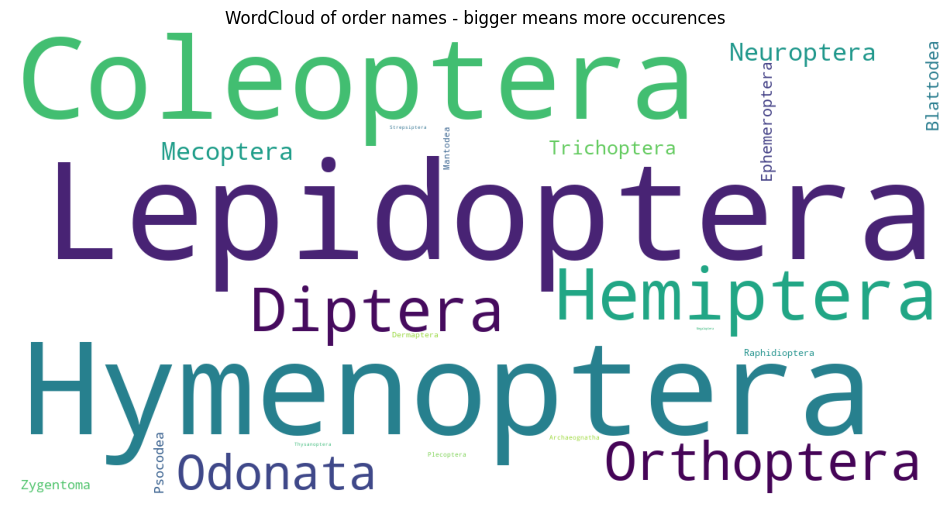

There are 22 different observations at this taxon level.


Counter({'Lepidoptera': 20697,
         'Hymenoptera': 18898,
         'Coleoptera': 14169,
         'Hemiptera': 7010,
         'Diptera': 4926,
         'Orthoptera': 3738,
         'Odonata': 2961,
         'Neuroptera': 119,
         'Mecoptera': 116,
         'Trichoptera': 67,
         'Blattodea': 50,
         'Ephemeroptera': 41,
         'Psocodea': 30,
         'Zygentoma': 29,
         'Raphidioptera': 13,
         'Mantodea': 10,
         'Dermaptera': 8,
         'Archaeognatha': 4,
         'Plecoptera': 4,
         'Strepsiptera': 2,
         'Thysanoptera': 2,
         'Megaloptera': 1})

In [94]:
"""
CELL N°8: WORDCLOUD
"""

counter = Counter(df[target_taxon])
tb.word_cloud(
    counter,
    title="WordCloud of "
    + str(target_taxon)
    + " names - bigger means more occurences",
)


print(
    "There are "
    + str(df[target_taxon].nunique())
    + " different observations at this taxon level."
)

counter

<div class="alert alert-warning">
<b>[Question 2.1] Features visualization </b> <br>
    
Based on what you have seen above and what you will try, you can already get an idea of which features seem to contain discriminative information, i.e., which features are likely to be more important for the clustering than others. Please, explain.
    
Justify which features you think would be interesting or not to keep in order to reach your goals.
Feel free to try and add your own data visualization to highlight their importance (or not).
</div>

<div class="alert alert-info">
<b>[Remark 2.1] Features visualization</b> <br>
As mentioned before, there are many ways to visualize data. 
    
Do not hesitate to support your arguments with original plots to illustrate your point. Feel also free to illustrate the potential new features you have introduced earlier.
</div>

In [95]:
"""
CELL N°9: YOUR OWN VISUALIZATIONS
Feel free to create more plots here (or elsewhere).
""";
import seaborn as sb
import matplotlib.pyplot as plt








"""
df['orderF'] = df['order'].factorize()[0]
df['familyF'] = df['family'].factorize()[0]
df['genusF'] = df['genus'].factorize()[0]


plt.figure(figsize=(10, 8))
sb.heatmap(df.corr(), cmap="YlGnBu")

# savefig
plt.savefig("new_heatmap.pdf")
plt.show()


# On peut voir que la corélation matrix ne donne pas beaucoup d'informations
"""



'\ndf[\'orderF\'] = df[\'order\'].factorize()[0]\ndf[\'familyF\'] = df[\'family\'].factorize()[0]\ndf[\'genusF\'] = df[\'genus\'].factorize()[0]\n\n\nplt.figure(figsize=(10, 8))\nsb.heatmap(df.corr(), cmap="YlGnBu")\n\n# savefig\nplt.savefig("new_heatmap.pdf")\nplt.show()\n\n\n# On peut voir que la corélation matrix ne donne pas beaucoup d\'informations\n'

<div class="alert alert-info">
<b>[Remark 2.2] Feature pruning</b> <br>
Based on your previous visualizations and choices, reuse the code at the top of the notebook to drop features that are unnecessary. 
</div>

In [96]:
"""
CELL N°10: REMOVING UNNECESSARY FEATURES
You can use this cell to drop other features (if any) you consider unnecessary.
"""

'\nCELL N°10: REMOVING UNNECESSARY FEATURES\nYou can use this cell to drop other features (if any) you consider unnecessary.\n'

<br><font size=5 color=#009999> <b>PART 2.2 - SPATIAL FEATURES VISUALIZATION</b> </font> <br><br>

As our dataset contains spatial coordinates for each observation, it is therefore imperative to correctly visualize the data concerning the localization of these latter.

Since this location information are based on real coordinates, we will be able to visualize this data on real maps. We therefore provide a set of tools that will allow you to observe the distribution of this data on a world map and, more precisely, in Belgium.

In [97]:
"""
CELL N°11: GEOGRAPHICAL VISUALIZATION

Read the code carefully and try to understand it. Then, play with it! 
"""

sub_df = df.sample(frac=0.1, random_state=1234)

brussels = {
    "lat": 50.8476,
    "lon": 4.3572,
}
try:
    fig = px.scatter_mapbox(
        sub_df,
        lat=sub_df["decimalLatitude"],
        lon=sub_df["decimalLongitude"],
        color=target_taxon,  # which column to use to set the color of markers
        hover_name=target_taxon,  # column added to hover information
        center=brussels,
        mapbox_style="open-street-map",
        color_discrete_sequence=px.colors.qualitative.Dark24,
    )

    fig.show()

except:
    print("data necessary for the plot has been removed in a previous cell")

<div class="alert alert-warning">
<b>[Question 2.2] Spatial features visualization </b> <br>

Based on the maps above, what can you infer about the locations of the individuals?
</div>


<br>
<font size=5 color=#009999> <b>2.3 - PCA</b> <br>
REDUCE THE DIMENSIONALITY OF THE DATA IN ORDER TO OBSERVE IT
</font> <br> <br>

<!---
The high dimensionality of the dataset (number of columns) makes data visualization hard. In order to gain some (partial) information about our data distribution,
--->
PCA is often considered as the simplest and most fundamental technique used in dimensionality reduction. Remember that PCA is essentially the rotation of coordinate axes, chosen such that each successful axis captures or preserves as much variance as possible. If the algorithm returns a new system coordinates of the same dimension as the input, we can keep only the axis corresponding to the 3 largest singular values and project data on this coordinates system to perform the visualization.


![PCAUrl](https://miro.medium.com/max/400/1*ZXhPoYQIn-Y8mxoUpz5Ayw.gif "PCA")

Although PCA allows to reduce dimensionality for a visualization purposes, it can also give information about the *importance of our features*. Indeed, some of them contribute more to the choice of the principal components and are therefore those that best explain the dataset.

To vizualize the importance of features, we can extract the [PCA loadings](https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html). These are indicators of the correlation between components and original features. The value of loadings is contained between -1 and 1. The more the value goes toward those boundaries, the more the feature influences the choice of component.  
We propose to perform a 2-dimensional PCA and then to add the loadings in vector form to the figure to obtain what is called a *biplot* (see example on the iris dataset below). 

>**NOTE**: even if the figure below resembles the previous one, the former displays the directions of the 3 principal components while this one shows the importance of each feature.

In [98]:
"""
CELL N°12: LOADINGS EXAMPLE ON A SEPARATE TOY DATASET
Plot of the reduced iris dataset to 2 dimensions with the loadings
(i.e. vectors that represent the importance of each feature)

There is nothing to do here ;-)
"""
iris = datasets.load_iris()

names = iris.target_names

X = preprocessing.scale(iris.data)
y = [names[i] for i in iris.target]

pca = PCA(n_components=2)
X_data2 = pca.fit_transform(X)

tb.biplot_visualization(pca, X_data2, y, columns=iris.feature_names)

Knowing that you will have to predict a taxon level from spatial and temporal coordinates, and optionally other information, you first need to split your dataset into a feature vector (`X`) and a target vector (`y`), then to reduce dimensionality of the feature space to compute and vizualize the loadings.

<div class="alert alert-warning">
<b>[Question 2.3] Feature importance visualization </b>  <br>
    Use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA">PCA</a> function from scikit learn to reduce your data to 2 dimensions. Then, use the <samp>biplot_visualization()</samp> function provided in the toolbox (<i>toolbox.py</i>) to vizualize the biplot graph.

Do all features have the same importance? If no, which features are less important, and why?
You can use all other graphs from the visualization part to justify your answer.
</div>

<div class="alert alert-info">
<b>[Remark 2.3] </b> <br>
Feel free to try this vizualization with numerical features you already dropped (if any) to support your previous choices.
</div>

In [105]:
"""
CELL N°13: FEATURE IMPORTANCE VISUALIZATION

IMPORTANT: only keep numerical features in X (no NaNs).
If needed, you can use a mapping function,e.g., from string
to numerical values. Dates are not numbers!

You can also select all numerical features with:
    df.select_dtypes(include=np.numbers)
"""

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# First, we recommend using a fraction of the datatest
# and you should remove this (of set frac=1) when you
# feel confident about your model

sub_df = df.sample(frac=0.1, random_state=1234)

output = target_taxon


#########################################################################################################
# Start : Student version
#########################################################################################################

y = sub_df[output]  # target output
X = sub_df.drop(columns=[output, "eventDate"])  # input DataFrame, without output column(s)

# colonnes à enlever car fortement corrélées avec d'autres (species et family corrélées avec genus, month corrélé avec season, year non pertinent)
X = X.drop(columns=["month", "species", "family", "year"])


columns = X.columns  # a vector of input feature names, usually `X.columns`

# Encodage des colonnes catégorielles (= non numériques)
label_encoder = LabelEncoder()
X["genus"] = label_encoder.fit_transform(X["genus"].astype(str))

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)  # do some standardization

# Apply a 2-dimensional PCA
pca = PCA(n_components=2)
X_data2 = pca.fit_transform(X)

#########################################################################################################
# End : Student version
#########################################################################################################


if all(not isinstance(x, type(...)) for x in [pca, X_data2, columns]):
    fig = tb.biplot_visualization(pca, X_data2, y, columns=columns)
    fig.show()

<div class="alert alert-info">
<b>[Remark 2.4] Feature pruning</b> <br>
Based on your previous conclusions you may want to prune other features. If so, reuse the code at the top of the notebook to drop those features. 
</div>

In [100]:
"""
CELL N°14: REMOVING UNNECESSARY FEATURES
You can use this cell to drop other features you consider unnecessary.
""";

<br> <br>
<font size=7 color=#009999> <b>PART 3 - IT'S TIME TO... CLUSTER!</b> </font> <br><br>

<br>
<font size=5 color=#009999> <b>3.1 - Clustering: definition, example and execution</b> <br>
THE ABC OF CLUSTERING
</font> <br> <br>

Clustering can be defined as the task of *grouping* objects from a set $S$ (here, each row/observation is an object) in such a way that objects assigned to the same group (called cluster) are more **similar** (or less **distant**) with respect to each other (in some sense) than to those assigned to the other groups. Usually, we would like to divide our objects into $K$ groups.

As such, clustering reduces to finding, among all $K$-partitions possible of $S$, the partition $\mathcal{P}$ that minimizes some error criterion $f(\mathcal{P})$. Each object will be assigned a cluster, $C_i$, and each cluster will have its centroid $c_i$ the distance between **any object** in $C_i$ to centroid $c_i$ is **always smaller** that the distance to any other centroid. In other words, each object is assigned to the cluster whose centroid is the closest.


A mathematical formulation of the problem could be the following, $$ \boxed{\min_{(C_1,\dots,C_K) \,\in\, \mathcal{P}}\,f(C_1,\dots,C_K) = \sum_{i = 1}^{K}\,\sum_{x \in C_i}\,\Delta(x,c_i)}$$

where $\Delta(x,c_i)$ denotes the distance between object $x$ and centroid $c_i$.

<br>
<font size=5 color=#009999>
EXAMPLE OF SEPARATING OBJECTS INTO 10 CLUSTERS
</font> <br> <br>

**First**, let us imagine the following 2D dataset.

<img src="Imgs/10-partitions-data.svg" width = "250">

**Then**, a 10-partition is defined by the position of the centroids, one for each cluster. Below, you can observe four examples of (random) centroids localizations (stars).

<img src="Imgs/10-partitions-chose-centroids.svg" width = "1000">

**Next**, the regions are colored based on their closest centroid. Here, we take the distance to be the Euclidean distance.

<img src="Imgs/10-partitions-centroids.svg" width = "1000">

**Finally**, data points (objects) are colored based in the region they are in.

<img src="Imgs/10-partitions-clusters.svg" width = "1000">


As a reminder, for this hackathon, your goal is to determine the taxon level that is the most likely to observe based on some input data.

To do so, you need first to <b>cluster your data</b>, then identify <b>the closest cluster to each element in your test set</b>, and finally **return a list a observation probabilities for each taxon variant**. Of course, the list of probabilities must sum to one!

A very easy way to generate such list is to **count the occurences** of each taxon variant in a cluster, and then **divide** each count by the number of observations in that cluster:

```python
from collections import Counter

observations_in_cluster = ... # This is pseudocode

count_per_variant = Counter(observations_in_cluster)
count = sum(variant_count for variant_count in count_per_variant.values())
probabilities = {
    variant_name: variant_count / count
    for variant_name, variant_count in count_per_variant.items()
}
```

Then, the classificaton score will be simple evaluated as:

```python
true_taxon_variant = ...

score = probabilities.get(true_taxon_variant, 0.0)  # The highest score is 1.0
```

<div class="alert alert-info">
<b>[Remark 3.1] </b> <br>
Here, we use probabilities rather that true prediction to avoid penalizing too much when a given cluster may contain multiple taxon variants with similar probabilities.
</div>

In [101]:
"""
CELL N°15: GROUND TRUTH
Create your own ground truth vector (i.e., split your dataset in train and validation sets)
Reuse X (standardized) and y from previous cell to create those sets.
"""

train_indices, val_indices = tb.train_val_indices(X.shape[0], val_frac=0.1, seed=1234)

X_train, X_val = X[train_indices, :], X[val_indices, :]
y_train, y_val = y.values[train_indices], y.values[val_indices]

<div class="alert alert-warning">
<b>[Question 3.1] Number of clusters </b>  <br>
    Accounting for all features (i.e., spatial <b>and</b> temporal coordinates), what do you think is the ideal number of clusters? What will happen if too many or even too few clusters are chosen?
</div>

Now that your dataset is divided into a train and a validation set, use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">KMeans</a> algorithm from `scikit-learn` to apply the clustering on your dataset.

In [102]:
"""
CELL N°16: KMEANS CLUSTERING
Use KMeans to group your data into k clusters
"""

k = 50  # initial value, you can replace it by whatever you prefer

#########################################################################################################
# Start : Student version
#########################################################################################################

kmeans = ...
cluster_y_train = ...  # predict the cluster index for each sample of X_train

#########################################################################################################
# End : Student version
#########################################################################################################


# We create a DataFrame from train data, that will contain the cluster of each entry
X_train_df = pd.DataFrame(data=X_train, columns=columns)
X_train_df["cluster"] = cluster_y_train
X_train_df[output] = y_train
X_train_df

,genus,decimalLatitude,decimalLongitude,day,hour,season,cluster,order
0,-1.709129,1.241142,-2.047988,0.824065,-0.612059,-1.365745,Ellipsis,Coleoptera
1,1.210163,0.250660,-1.650195,-0.309007,0.000028,1.543747,Ellipsis,Hymenoptera
2,-1.254135,-0.710483,0.524033,-1.555386,1.020174,1.543747,Ellipsis,Hemiptera
3,0.501716,1.075694,0.151491,-0.988850,-0.204001,1.543747,Ellipsis,Lepidoptera
4,-1.070916,0.785204,-1.231849,1.390601,-0.408030,0.089001,Ellipsis,Coleoptera
...,...,...,...,...,...,...,...,...
6556,0.501716,-0.789748,0.445001,-0.082393,0.408086,0.089001,Ellipsis,Lepidoptera
6557,-0.640351,0.308042,-2.100214,0.257529,-0.612059,0.089001,Ellipsis,Diptera
6558,0.617754,-0.474999,-0.260948,1.390601,0.204057,0.089001,Ellipsis,Coleoptera
6559,1.210163,1.459762,0.034011,-1.668693,0.612115,1.543747,Ellipsis,Hymenoptera


<div class="alert alert-warning">
<b>[Question 3.2] Cluster composition </b>  <br>
Currently, we suggest returning a list of probabilities, not a true unique prediction.
How could you return a prediction <code>y_pred</code> given an input observation vector <code>x</code>?
Also, what do you think would be the best way to do so (based on a simple binary score function)? Explain.
</div>

In [103]:
"""
CELL N°17: PREDICTING TAXON VARIANT
Return the taxon variant probabilities for each element in your validation set.

You are encourage to vary:
- the number of clusters
- the predicted taxon level - (see remark 3.3)
"""

propabilities_per_cluster = {
    cluster_id: (cluster_df[output].value_counts() / cluster_df.shape[0]).to_dict()
    for cluster_id, cluster_df in X_train_df.groupby("cluster")
}

propabilities_per_cluster

#########################################################################################################
# Start : Student version
#########################################################################################################

# add more tests here

#########################################################################################################
# End : Student version
#########################################################################################################



{Ellipsis: {'Lepidoptera': 0.2862368541380887,
  'Hymenoptera': 0.2568206066148453,
  'Coleoptera': 0.19707361682670324,
  'Hemiptera': 0.09465020576131687,
  'Diptera': 0.06569120560890108,
  'Orthoptera': 0.049230300259106845,
  'Odonata': 0.0438957475994513,
  'Mecoptera': 0.0015241579027587258,
  'Neuroptera': 0.0012193263222069807,
  'Blattodea': 0.001066910531931108,
  'Trichoptera': 0.0009144947416552355,
  'Mantodea': 0.0004572473708276177,
  'Ephemeroptera': 0.0004572473708276177,
  'Psocodea': 0.00030483158055174517,
  'Zygentoma': 0.00030483158055174517,
  'Raphidioptera': 0.00015241579027587258}}

<br>
<font size=5 color=#009999> <b>3.2 - RESULTS ANALYSIS </b> <br>
OBSERVE AND COMPARE
</font> <br> <br>

In this section, we adress the difficult task of evaluating the performance of the clustering algorithm.


<br>
<b>1. Use a metric function.</b> One way to assess the quality of your data partitionning is to use a metric that compares the predicted vector with the true one according to a well chosen function. For this hackathon, you can find in <i>toolbox.py</i>, the function <samp>accuracy_metric()</samp> that contains the metric we will use to evaluate your solution. The value of the metric lies between 0 and 1, 0 being the worse case and 1 the best.


In [104]:
"""
CELL N°18: METRIC

Compute the metric on the validation set.
"""

#########################################################################################################
# Start : Student version
#########################################################################################################

cluster_ids = kmeans.predict(X_val)

y_pred = [propabilities_per_cluster[cluster_id] for cluster_id in cluster_ids]

#########################################################################################################
# End : Student version
#########################################################################################################


accuracy = tb.accuracy_metric(y_val, y_pred)

print(
    "Prediction on",
    output,
    "resulted in an average accuracy of",
    np.mean(accuracy),
    f"(std.: {np.std(accuracy)})",
)

AttributeError: 'ellipsis' object has no attribute 'predict'

<b>2. Compare different solutions.</b> An important thing to do while looking for an optimal solution is to compare the impact of your changes. Since you have access to the metric function, you should be able to assess the evolution of the metric value according to your choice of hyperparameters, methods, etc.  
> **NOTE:**  graphs are great tools for comparing solutions.

In [ ]:
"""
CELL N°19: COMPARE METHODS
""";

#########################################################################################################
# Start : Student version
#########################################################################################################

# Feel free to use this cell to implement your way of comparing your methods

#########################################################################################################
# End : Student version
#########################################################################################################



**3. Evaluate your solution on unknown data.** Now that you have made all the choices regarding your clustering solution and your model is ready, you need to evaluate it on new data (i.e., not used during the training step). We provide you with a test set containing new observations. Apply your method to this data and use the metric function to evaluate the results.  
> **NOTE:** do not forget all the preprocessing steps you had to do on the training set before using it as input to your clustering model. 

In [ ]:
"""
CELL N°20: EVALUATE ON TEST DATA
Whenever you feel that your model is ready, you should evaluate on unkwown test data.
"""

df_test

#########################################################################################################
# Start : Student version
#########################################################################################################

# evaluate your model(s) on the test data

#########################################################################################################
# End : Student version
#########################################################################################################

<div class="alert alert-warning">
<b>[Question 3.3] Your clustering solution </b> <br> 
Describe here your clustering solution (how many clusters and other important choices that have been made, etc.). Justify your choices with the help of the metric.
</div>

<div class="alert alert-info">
<b>[Remark 3.2] </b> <br>
Do not hesitate to accompany your explanation with some graphs. You can support your answer by ploting, by example, the evolution of the quality of your predictions according to the number <code>k</code> of clusters.
</div>

<div class="alert alert-info">
<b>[Remark 3.3] </b> <br>
    By default, the target output is set to the taxon level <code>ORDER</code>. What happens if you change the predicted taxon level to another, e.g., <code>FAMILY</code>? Question 3.4 is dedicated to this comparison.
</div>

<div class="alert alert-warning">
<b>[Question 3.4] Comparing models - BONUS</b> <br> 
Compare how your model performs when predicting other taxon levels. I.e., does predicting taxonomy at a different level performs better or worse than the default?
</div>


<font size=5 color=#009999>
WELL DONE!
</font>

Now, you should be able to create a complete pipeline, from start to end, that can train a model on a data, and output some prediction for a given input vector. This will be seen during, e.g., the [LELEC2870 - Machine learning : regression, deep networks and dimensionality reduction](https://uclouvain.be/en-cours-2021-lelec2870) classes.